# Bank Fears Loanliness 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()
seed = 42
import warnings 
warnings.filterwarnings("ignore")

## Import dataframe

In [2]:
data = pd.read_csv('train_indessa.csv', low_memory=False)

In [3]:
data.describe().round(2)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,532428.00,532428.00,532428.00,532428.00,532428.00,532425.00,532428.00,532412.00,532412.00,259874.00,...,532428.00,532428.00,532428.00,532333.00,132980.00,532412.00,490424.00,490424.00,490424.00,532428.00
mean,35005472.35,14757.60,14744.27,14704.93,13.24,75029.84,18.14,0.31,0.69,34.06,...,0.39,45.72,4.86,0.01,44.12,0.01,213.56,139554.11,32080.57,0.24
std,24121476.52,8434.42,8429.14,8441.29,4.38,65199.85,8.37,0.86,1.00,21.88,...,4.09,409.65,63.12,0.13,22.20,0.08,1958.57,153914.88,38053.04,0.42
min,70473.00,500.00,500.00,0.00,5.32,1200.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,10866882.50,8000.00,8000.00,8000.00,9.99,45000.00,11.93,0.00,0.00,15.00,...,0.00,0.00,0.00,0.00,27.00,0.00,0.00,29839.75,14000.00,0.00
50%,37095895.00,13000.00,13000.00,13000.00,12.99,65000.00,17.65,0.00,0.00,31.00,...,0.00,0.00,0.00,0.00,44.00,0.00,0.00,80669.50,23700.00,0.00
75%,58489200.75,20000.00,20000.00,20000.00,16.20,90000.00,23.95,0.00,1.00,50.00,...,0.00,0.00,0.00,0.00,61.00,0.00,0.00,208479.25,39800.00,0.00
max,73544841.00,35000.00,35000.00,35000.00,28.99,9500000.00,672.52,30.00,31.00,180.00,...,358.68,33520.27,7002.19,16.00,180.00,14.00,496651.00,8000078.00,9999999.00,1.00


In [4]:
data.describe(include=[np.object])

,term,batch_enrolled,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,initial_list_status,application_type,verification_status_joint,last_week_pay
count,532428,447279,532428,532428,501595,505537,532428,532428,532428,75599,532428,532338,532428,532428,532428,532428,305,532428
unique,2,104,7,35,190124,11,6,3,2,70638,14,39693,917,51,2,2,3,98
top,36 months,,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,n,> Debt consolidation<br>,debt_consolidation,Debt consolidation,945xx,CA,f,INDIVIDUAL,Not Verified,13th week
freq,372793,106079,152713,33844,8280,175105,265940,197750,532420,576,314989,248967,5845,77911,274018,532123,170,30333


# Checking data proportion

In [5]:
loan = data.loan_status.value_counts().to_frame().rename(columns={"loan_status":"absolute"})
loan["percent"] = (loan.apply(lambda x: x/x.sum()*100).round(2))
display(loan)

,absolute,percent
0,406601,76.37
1,125827,23.63


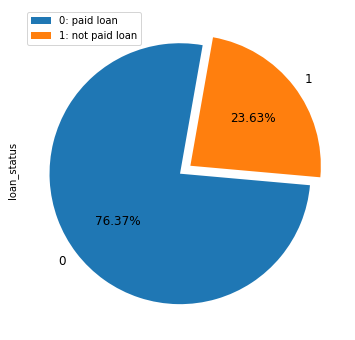

In [6]:
data.loan_status.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: paid loan","1: not paid loan"]);

In [7]:
data.dtypes.sort_values(ascending=True)

member_id                        int64
funded_amnt                      int64
loan_status                      int64
loan_amnt                        int64
funded_amnt_inv                float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                     float64
total_acc                      float64
total_rec_int                  float64
total_rec_late_fee             float64
collection_recovery_fee        float64
collections_12_mths_ex_med     float64
mths_since_last_major_derog    float64
acc_now_delinq                 float64
tot_coll_amt                   float64
tot_cur_bal                    float64
recoveries                     float64
total_rev_hi_lim               float64
mths_since_last_delinq         float64
dti                            float64
int_rate                       float64
delinq_2yrs                    float64
annual_inc               

In [8]:
 data.dtypes.value_counts()

float64    23
object     18
int64       4
dtype: int64

# Cheking missing values in given dataset

In [9]:
null = data.isnull().sum().to_frame().rename(columns={0:"absolute"})
null["percent"] = (null.apply(lambda x: x/x.sum())*100).round(2)
null

,absolute,percent
member_id,0,0.00
loan_amnt,0,0.00
funded_amnt,0,0.00
funded_amnt_inv,0,0.00
term,0,0.00
batch_enrolled,85149,3.58
int_rate,0,0.00
grade,0,0.00
sub_grade,0,0.00
emp_title,30833,1.30


## Handling missing values

## Fill all the missing values with mean/median/mode with respect to their datatype


<AxesSubplot:>

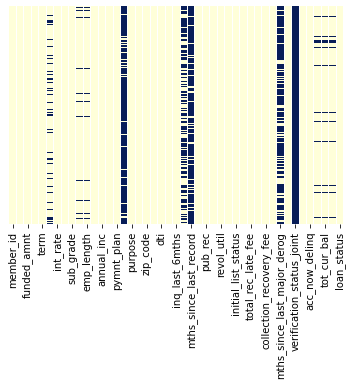

In [10]:
sns.heatmap(data.isnull(), yticklabels= False, cbar=False, cmap='YlGnBu')

In [11]:
data['batch_enrolled'].fillna(data['batch_enrolled'].mode(), inplace = True)
data['emp_title'].fillna(data['emp_title'].mode(), inplace = True)
data['emp_length'].fillna(data['emp_length'].mode(), inplace = True)
data['annual_inc'].fillna(data['annual_inc'].median(), inplace = True)
data['batch_enrolled'].fillna(data['batch_enrolled'].mode(), inplace = True)
data['sub_grade'].fillna(data['sub_grade'].mode(), inplace = True)
data['revol_util'].fillna(data['revol_util'].median(), inplace = True)
data['total_acc'].fillna(data['total_acc'].median(), inplace = True)
data['collections_12_mths_ex_med'].fillna(data['collections_12_mths_ex_med'].median(), inplace = True)

In [12]:
data['title']=data['title'].fillna(data['title'].mode()[0])
data['delinq_2yrs']=data['delinq_2yrs'].fillna(data['delinq_2yrs'].mode()[0]) 
data['inq_last_6mths']=data['inq_last_6mths'].fillna(data['inq_last_6mths'].mode()[0])
data['tot_coll_amt']=data['tot_coll_amt'].fillna(data['tot_coll_amt'].mode()[0])
data['acc_now_delinq']=data['acc_now_delinq'].fillna(data['acc_now_delinq'].mode()[0])
data['tot_cur_bal']=data['tot_cur_bal'].fillna(data['tot_cur_bal'].mode()[0]) 
data['total_rev_hi_lim']=data['total_rev_hi_lim'].fillna(data['total_rev_hi_lim'].mode()[0])
 

In [13]:
data.drop(['desc'], axis=1, inplace=True)
data.drop(['mths_since_last_delinq'], axis=1, inplace=True)
data.drop(['mths_since_last_record'], axis=1, inplace=True)
data.drop(['mths_since_last_major_derog'], axis=1, inplace=True)
data.drop(['verification_status_joint'], axis=1, inplace=True)
 

In [14]:
data.drop(['pymnt_plan'], axis=1, inplace=True)

<AxesSubplot:>

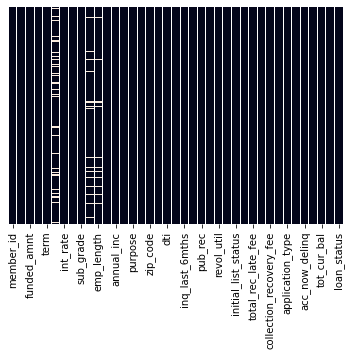

In [15]:
sns.heatmap(data.isnull(), yticklabels= False, cbar=False)

In [16]:
data.dropna(inplace=True)

<AxesSubplot:>

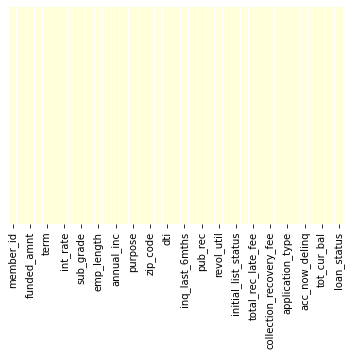

In [17]:
sns.heatmap(data.isnull(), yticklabels= False, cbar=False, cmap='YlGnBu')

In [18]:
data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,0.0,0.0,INDIVIDUAL,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,0.0,0.0,INDIVIDUAL,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,0.0,0.0,INDIVIDUAL,96th week,0.0,0.0,47159.0,47033.0,0


## Handle Categorical features

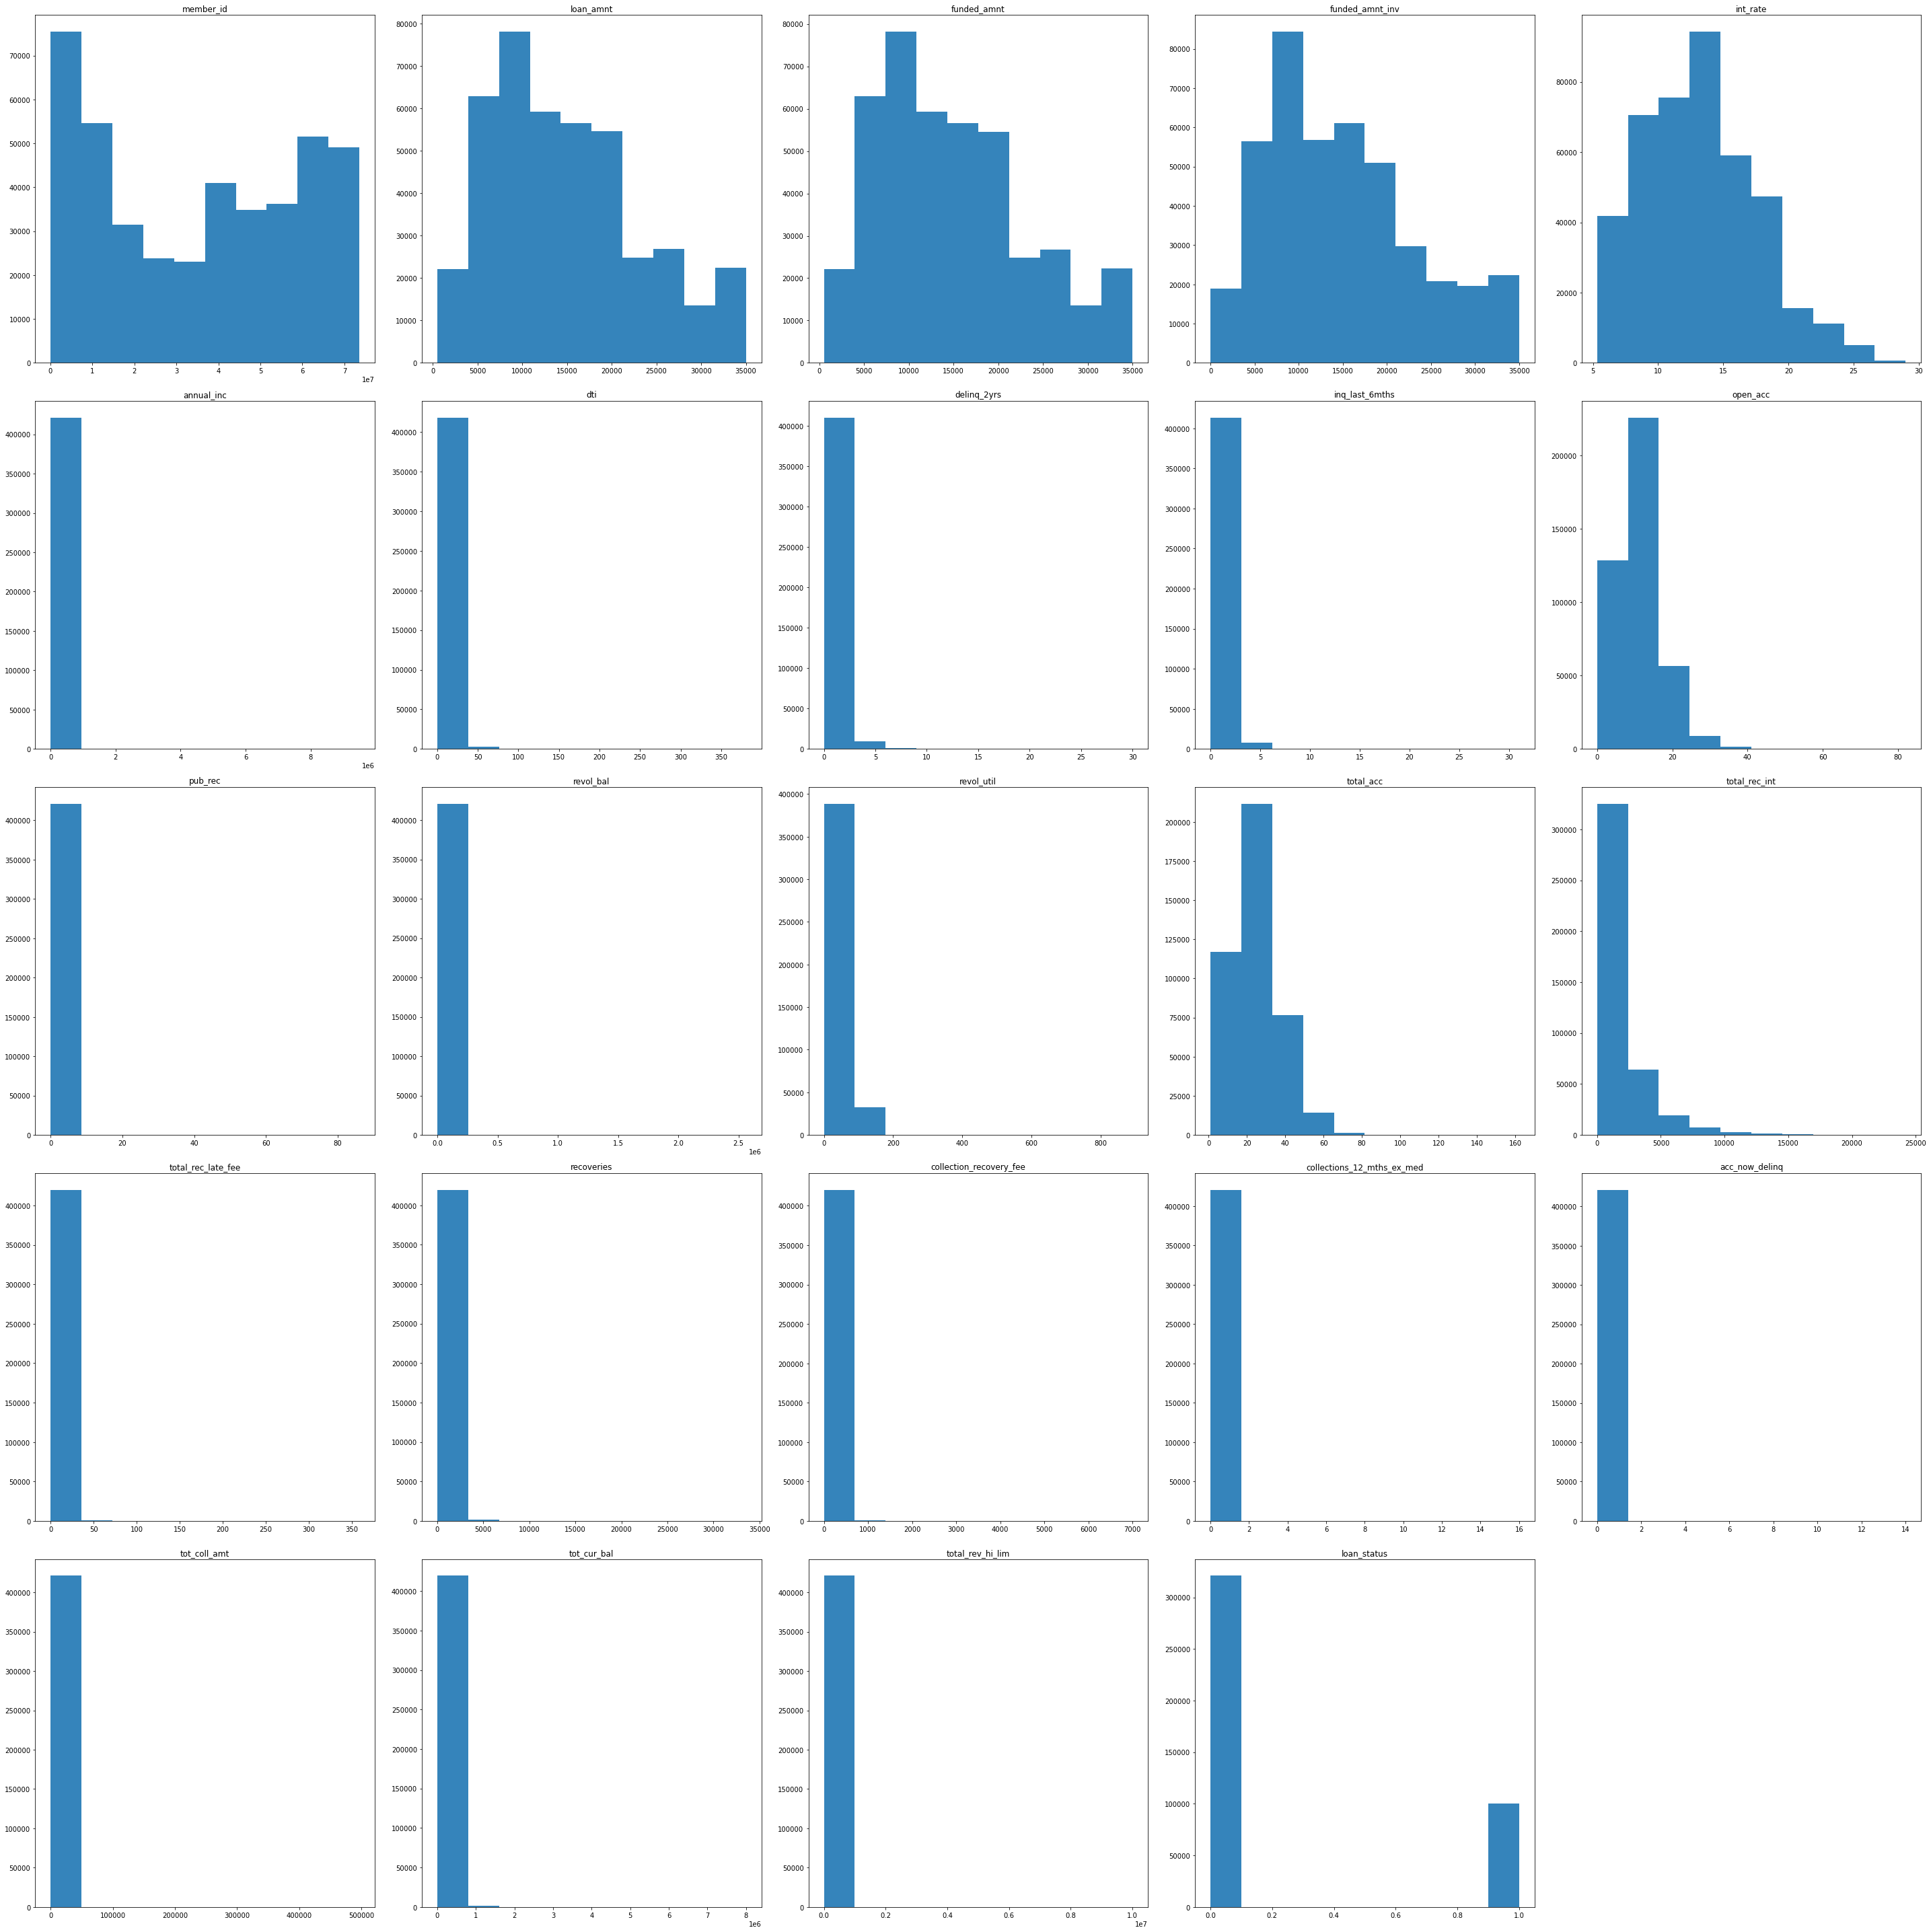

In [18]:
data.hist(figsize=([40,40]), xlabelsize=10, ylabelsize=10, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

## Visualization of the categoric distribution

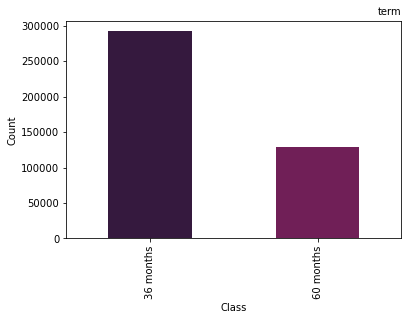

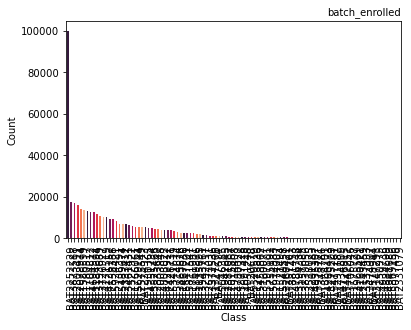

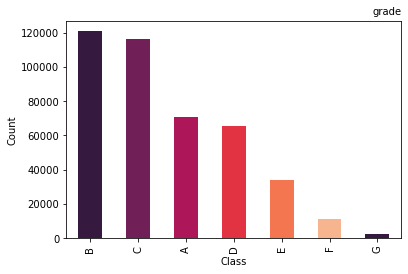

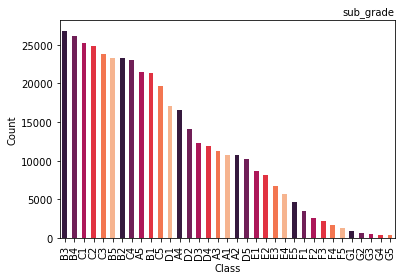

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001EC5C1468B0> (for post_execute):


KeyboardInterrupt: 

In [19]:
for col in data.select_dtypes(include=["object"]).columns:
    data[col].value_counts().plot(kind="bar", color=sns.color_palette("rocket"))
    
    plt.xlabel("Class", fontsize=10)
    plt.xticks(rotation=90, horizontalalignment="center")
    plt.ylabel("Count", fontsize=10)
    plt.title(col, fontsize=10, loc="right")
    plt.show()

In [20]:
data.term = data.term.str.lower()
data.term.value_counts()

36 months    292022
60 months    129235
Name: term, dtype: int64

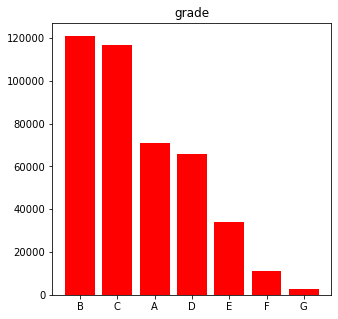

In [21]:
plt.figure(figsize=(5,5))
plt.bar(list(data['grade'].value_counts().keys()),list(data['grade'].value_counts()),color=['r'])
plt.title('grade')
plt.show()

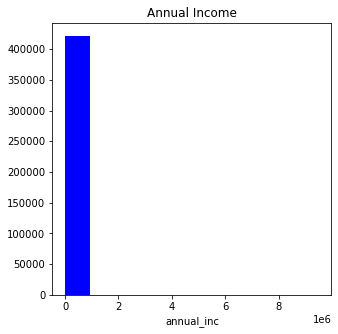

In [22]:
plt.figure(figsize=(5,5))
plt.hist(data['annual_inc'] ,color='b')
plt.xlabel('annual_inc')
plt.title('Annual Income')
plt.show()

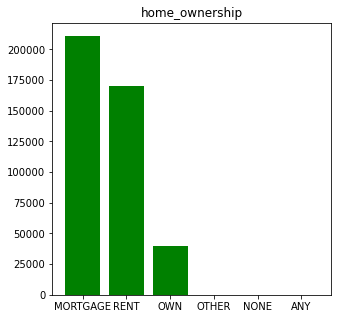

In [23]:
plt.figure(figsize=(5,5))
plt.bar(list(data['home_ownership'].value_counts().keys()),list(data['home_ownership'].value_counts()),color=['g'])
plt.title('home_ownership')
plt.show()

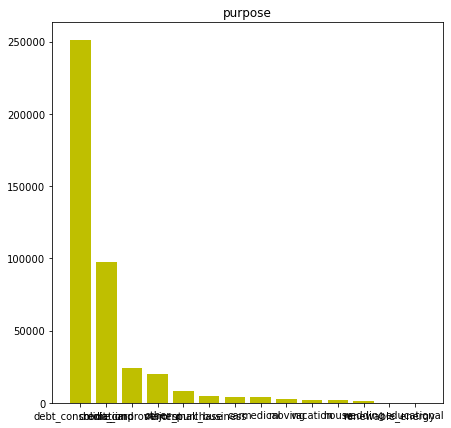

In [24]:
plt.figure(figsize=(7,7))
plt.bar(list(data['purpose'].value_counts().keys()),list(data['purpose'].value_counts()),color=['y'])
plt.title('purpose')
plt.show()

<AxesSubplot:>

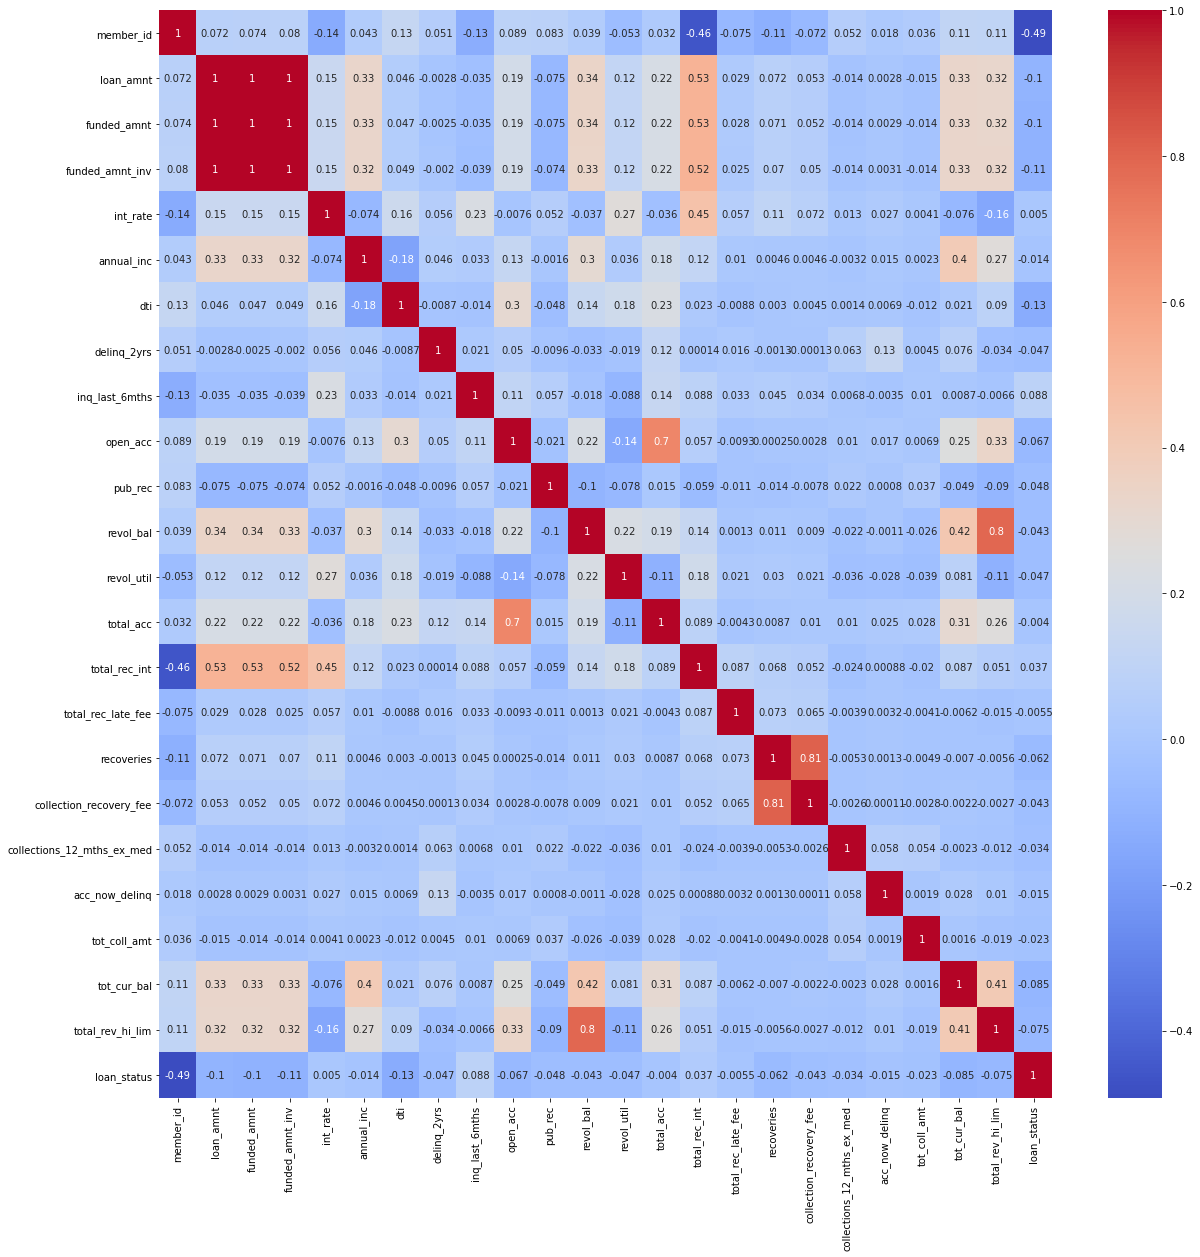

In [25]:
import seaborn as sn
plt.subplots(figsize = ([20,20]))
sn.heatmap(data.corr(),cmap="coolwarm",annot=True)

In [131]:
new_data = pd.read_csv('train_indessa.csv',usecols=['member_id','term','batch_enrolled','addr_state','last_week_pay','application_type',
            'grade','sub_grade','emp_title','zip_code','home_ownership','title','initial_list_status',
            'verification_status','pymnt_plan','purpose','emp_length','loan_status' ]) 
new_data.head()

,member_id,term,batch_enrolled,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,initial_list_status,application_type,last_week_pay,loan_status
0,58189336,36 months,,E,E3,clerk,9 years,OWN,Source Verified,n,debt_consolidation,Debt consolidation,349xx,FL,f,INDIVIDUAL,26th week,0
1,70011223,36 months,BAT1586599,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,Source Verified,n,home_improvement,Home improvement,209xx,MD,w,INDIVIDUAL,9th week,0
2,70255675,36 months,BAT1586599,A,A4,Driver,2 years,OWN,Not Verified,n,debt_consolidation,Debt consolidation,447xx,OH,w,INDIVIDUAL,9th week,0
3,1893936,36 months,BAT4808022,D,D5,Us office of Personnel Management,10+ years,RENT,Not Verified,n,debt_consolidation,Debt consolidation,221xx,VA,f,INDIVIDUAL,135th week,0
4,7652106,36 months,BAT2833642,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,Verified,n,credit_card,refi,900xx,CA,w,INDIVIDUAL,96th week,0


In [99]:
# unique values in each columns
for x in new_data.columns:
     
    print(x ,':', len(new_data[x].unique()))

member_id : 532428
term : 2
batch_enrolled : 105
grade : 7
sub_grade : 35
emp_title : 190125
emp_length : 12
home_ownership : 6
verification_status : 3
pymnt_plan : 2
purpose : 14
title : 39694
zip_code : 917
addr_state : 51
initial_list_status : 2
application_type : 2
last_week_pay : 98
loan_status : 2


In [100]:
for label in new_data:
    new_data[label] = np.where(new_data['term']==label,1,0)
#new_data[['term']]

In [101]:
for label in new_data:
    new_data[label] = np.where(new_data['batch_enrolled']==label,1,0)
#new_data[['batch_enrolled']]

In [102]:
for label in new_data:
    new_data[label] = np.where(new_data['grade']==label,1,0)
#new_data[['grade']]

In [103]:
for label in new_data:
    new_data[label] = np.where(new_data['sub_grade']==label,1,0)
#new_data[['sub_grade']]

In [104]:
for label in new_data:
    new_data[label] = np.where(new_data['emp_title']==label,1,0)
#new_data[['emp_title']]

In [105]:
for label in new_data:
    new_data[label] = np.where(new_data['emp_length']==label,1,0)
#new_data[['emp_length']]

In [106]:
for label in new_data:
    new_data[label] = np.where(new_data['home_ownership']==label,1,0)
#new_data[['home_ownership']]

In [107]:
for label in new_data:
    new_data[label] = np.where(new_data['verification_status']==label,1,0)
#new_data[['verification_status']]

In [108]:
for label in new_data:
    new_data[label] = np.where(new_data['pymnt_plan']==label,1,0)
#new_data[['pymnt_plan']]

In [109]:
for label in new_data:
    new_data[label] = np.where(new_data['purpose']==label,1,0)
#new_data[['purpose']]

In [110]:
for label in new_data:
    new_data[label] = np.where(new_data['title']==label,1,0)
#new_data[['title']]

In [111]:
for label in new_data:
    new_data[label] = np.where(new_data['zip_code']==label,1,0)
#new_data[['zip_code']]

In [112]:
for label in new_data:
    new_data[label] = np.where(new_data['addr_state']==label,1,0)
#new_data[['addr_state']]

In [113]:
for label in new_data:
    new_data[label] = np.where(new_data['initial_list_status']==label,1,0)
#new_data[['initial_list_status']]

In [114]:
for label in new_data:
    new_data[label] = np.where(new_data['application_type']==label,1,0)
#new_data[['application_type']]

In [132]:
for label in new_data:
    new_data[label] = np.where(new_data['last_week_pay']==label,1,0)
#new_data[['last_week_pay']]

In [133]:
member_id = data['member_id']

In [134]:
loan_status = data['loan_status']

KeyError: 'loan_status'

In [118]:
new_data.tail(20)

,member_id,term,batch_enrolled,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,initial_list_status,application_type,last_week_pay,loan_status
532408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
532409,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
532410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
532411,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
532412,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
532413,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
532414,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
532415,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
532416,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
532417,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
data = new_data.copy()

In [47]:
data.head(20)

,member_id,term,batch_enrolled,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,initial_list_status,application_type,last_week_pay,loan_status
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Combine Train and Test Data 

In [119]:
data1=pd.read_csv('Submission2.csv')

In [120]:
data1.shape

(532428, 17)

In [121]:
data1.head()

,member_id,term,batch_enrolled,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,initial_list_status,application_type,last_week_pay
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [122]:
data.shape

(532428, 17)

In [123]:
final=pd.concat([data,data1],axis=0)

In [124]:
final.shape

(1064856, 17)

In [125]:
final = final.loc[:, ~final.columns.duplicated()]

In [126]:
final.shape

(1064856, 17)

In [127]:
final.head()

,member_id,term,batch_enrolled,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,initial_list_status,application_type,last_week_pay
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [128]:
data = final.iloc[:532428, : ]
data1 = final.iloc[532428:, : ]

#data1=data1.drop(['loan_status'],inplace=True)
data1=data1.drop(['member_id'],inplace=True)

In [129]:
x_train = data.drop(['loan_status'], axis=1)
y_train = data['loan_status']

KeyError: "['loan_status'] not found in axis"

In [130]:
data.shape

(532428, 17)

In [137]:
import xgboost
classifier = xgboost.XGBRegressor()
classifier.fit(x_train._get_numeric_data(), np.ravel(y_train, order='C'))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [138]:
import pickle
filename = 'Finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [142]:
y_pred = classifier.predict(data1)

In [143]:
y_pred

array([1.6173647e-16, 1.6173647e-16, 1.6173647e-16, ..., 1.6173647e-16,
       1.6173647e-16, 1.6173647e-16], dtype=float32)

In [145]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('Submission2.csv')
datasets = pd.concat([sub_df['member_id'],pred],axis=1)
datasets.columns=['member_id','loan_status']
datasets.to_csv('Submission2.csv',index=False)